# Extract the values from the .txt file

### 1.1 Data extraction

In [119]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

airfoils = ["SC(2)-0714", "NACA2210", "NACA2312", "NACA65(2)-212"]
machs = ["07", "02"]

airfoils_name = sorted(["SC(2)-0714", "NACA 2210", "NACA 2312", "NACA 65(2)-212"])

naca_digits = 4
titles = 10


In [120]:
for file in os.listdir("raw_data"):
    new_name = file[:3]
    print(file)
    #os.rename()

M02_NACA2210.txt
M02_NACA2312.txt
M02_NACA65(2)-212.txt
M02_SC(2)-0714.txt
M07_NACA2210.txt
M07_NACA2312.txt
M07_NACA65(2)-212.txt
M07_SC(2)-0714.txt


### 1.2 <span style="color:white">  Create CSV files for all the airfoils and mach numbers in the lists</span>.

In [121]:
for airfoilname in airfoils:
    for M in machs:

        filename = "raw_data/M" + M + "_" + airfoilname + ".txt" # this file is the main file
        csv_file = "csv/M" + M + "_" + airfoilname + ".csv"
        graphsave = "graphs/" + airfoilname + M + ".svg"

        with open(filename, 'r') as file:
            lines = file.readlines()
            columns = lines[titles-1].strip().split()

            lst = []
            for line in lines[11:]:
                line = line.strip().split()
                lst.append(line)  
                

        with open(csv_file, 'w') as f:
            csv_writer = csv.writer(f)
            csv_writer.writerow(columns)
            csv_writer.writerows(lst)
            
files = os.listdir("csv")

## 2. Analyse airfoils for each value

##### Plotting the CL/alpha

M02_NACA2210
0.09992
M02_NACA2312
0.10606666666666666
M02_NACA65(2)-212
0.11288000000000001
M02_SC(2)-0714
0.13363999999999998
M07_NACA2210
0.18144
M07_NACA2312
0.14720000000000003


IndexError: index 6 is out of bounds for axis 0 with size 6

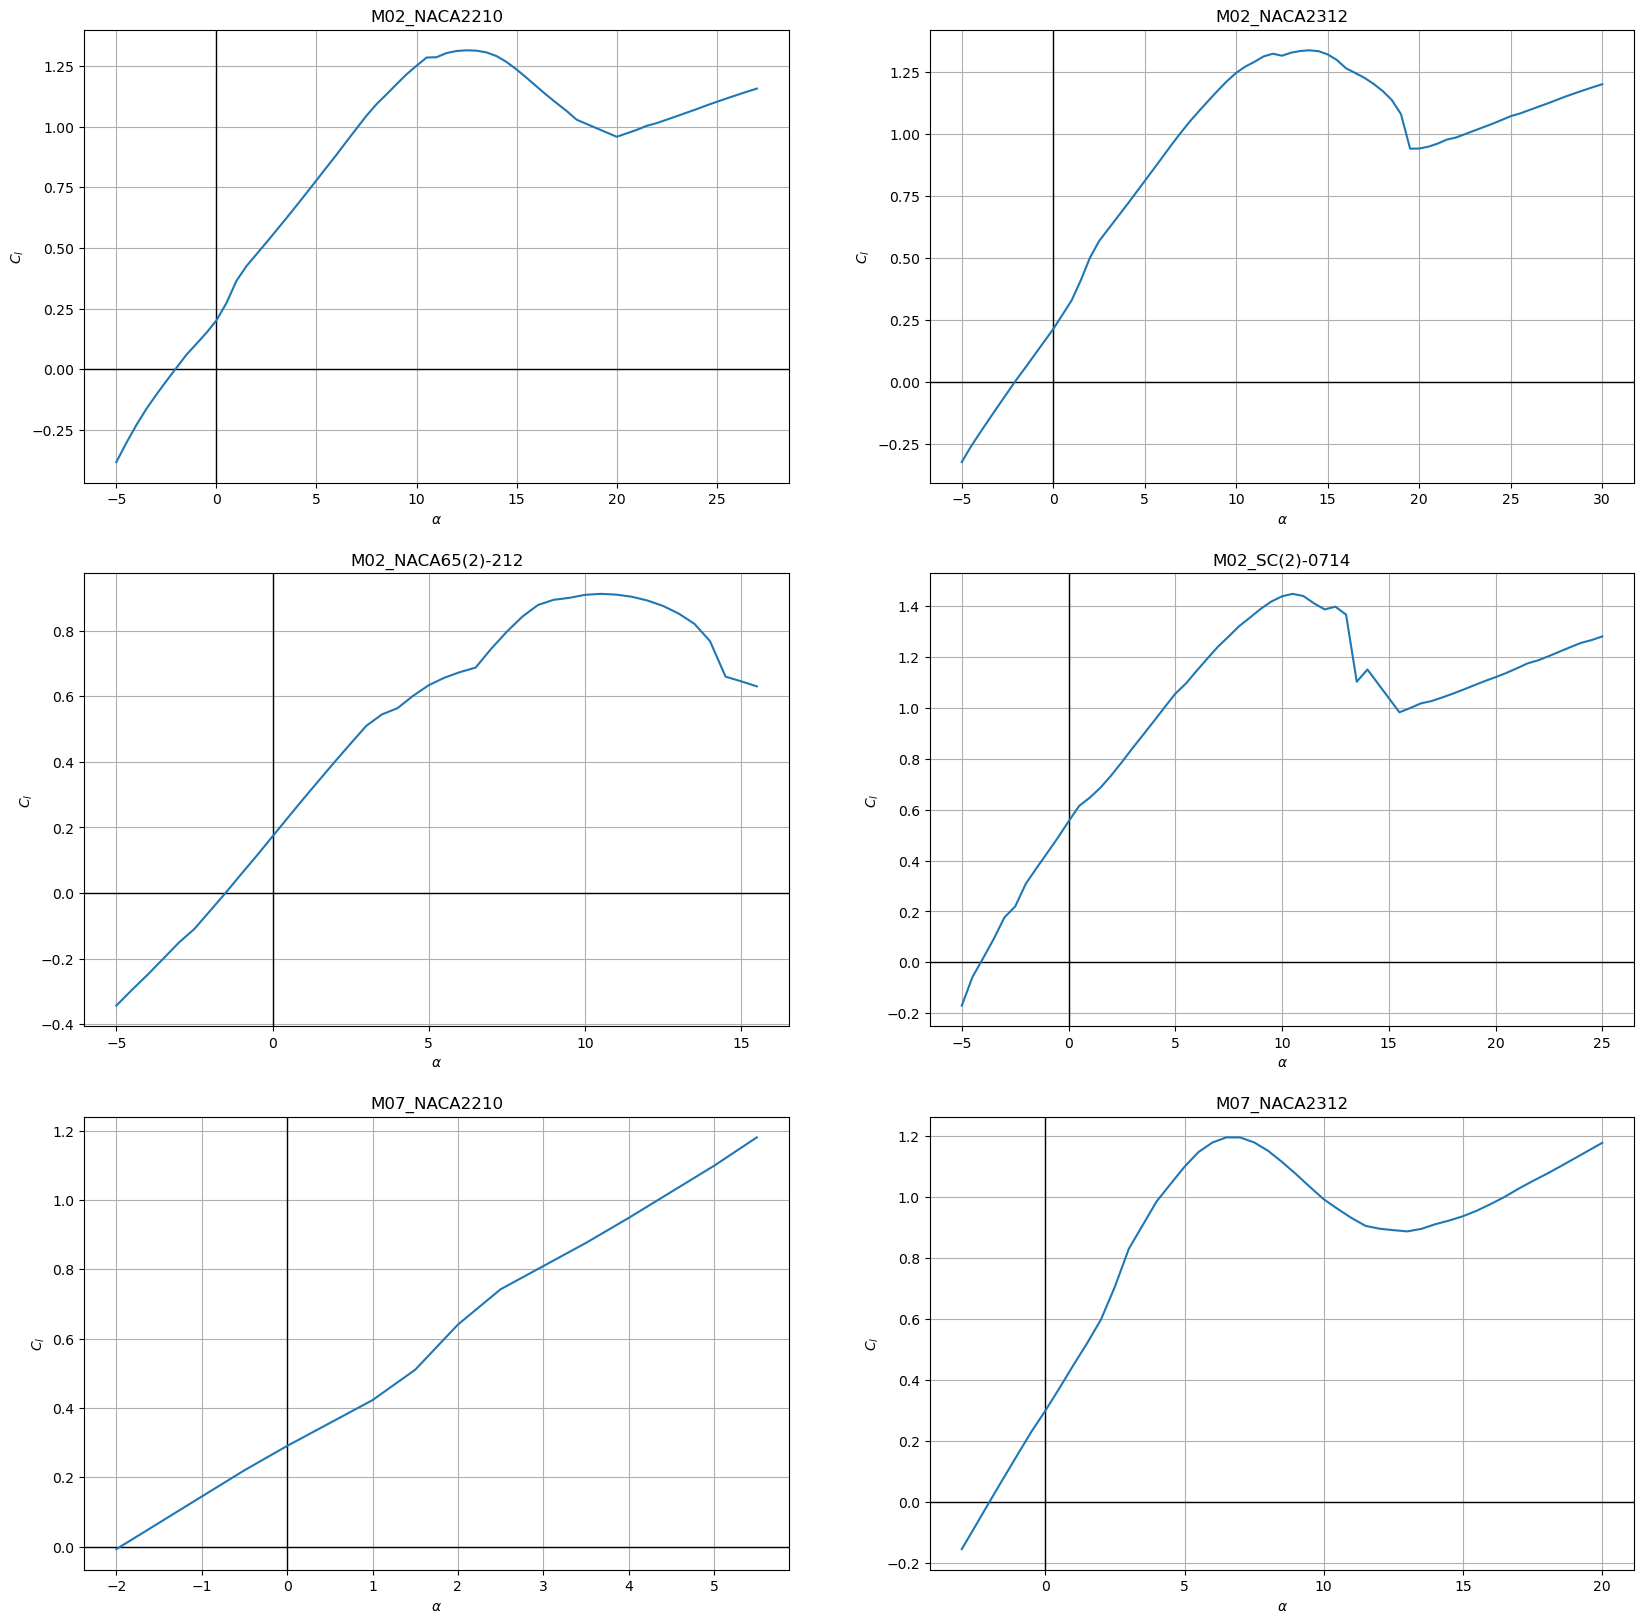

In [122]:
fig, axs = plt.subplots(3, 2,figsize=(20, 20))
for index, file in enumerate(files):
    df = pd.read_csv(os.path.join("csv", file))
    
    axs.flat[index].grid(True)
    axs.flat[index].set_xlabel("$\\alpha$")
    axs.flat[index].set_ylabel("$C_l$")
    #axs.flat[index].set_xlim(-5, 10)
    
    axs.flat[index].set_title(f'{file[:-4]}')
    axs.flat[index].axhline(linewidth=1, color="k")
    axs.flat[index].axvline(linewidth=1, color="k")
    
    print(file[:-4])
    print((df["CL"][10] - df["CL"][5])/(df["alpha"][10] - df["alpha"][5]))
    axs.flat[index].plot(df["alpha"], df["CL"])


plt.tight_layout()
plt.show()
    

## 2.2 Graph CL - $\alpha$ curves for the four airfoils

### 2.2.1 Mach 0.2

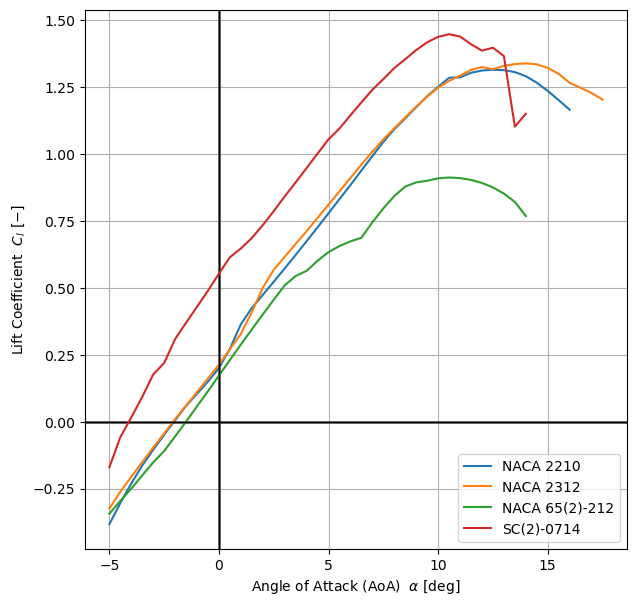

In [128]:
fig, axs = plt.subplots(figsize=(7, 7))

for index, file in enumerate(files[:4]):
    
    df = pd.read_csv(os.path.join("csv", file))
    max_index = df["CL"].idxmax()
    df = df[:max_index + 8]
    axs.grid(True)
    axs.set_xlabel(r"Angle of Attack (AoA)  $\alpha \ [\deg]$", fontsize = 10)
    axs.set_ylabel(r"Lift Coefficient  $C_l \ [-]$", fontsize = 10)
    
    #axs.set_title(f'{file[:-4]}')
    axs.axhline(linewidth=1, color="k")
    axs.axvline(linewidth=1, color="k")
    
    axs.plot(df["alpha"], df["CL"], label = airfoils_name[index])

axs.legend()

plt.savefig("graphs/M02_CL-alpha.svg")
#plt.tight_layout()
plt.show()


### 2.2.2 Mach 0.7

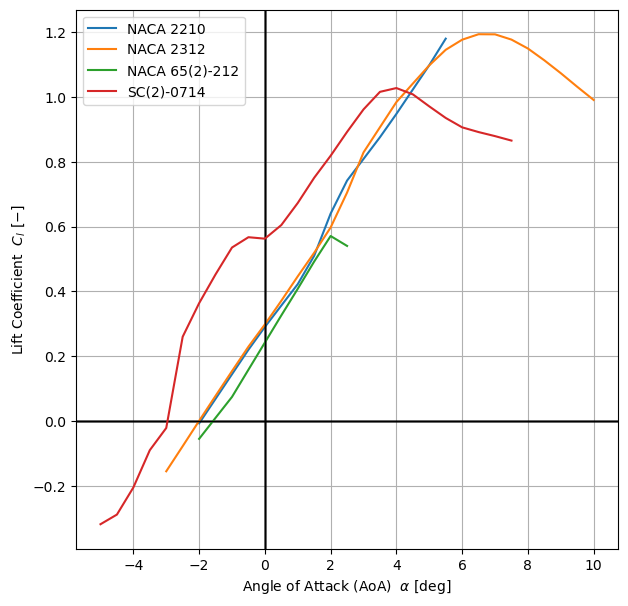

In [127]:
fig, axs = plt.subplots(figsize=(7, 7))

for index, file in enumerate(files[4:]):
    
    df = pd.read_csv(os.path.join("csv", file))

    max_index = df["CL"].idxmax()
    df = df[:max_index + 8]
    axs.grid(True)
    axs.set_xlabel(r"Angle of Attack (AoA)  $\alpha \ [\deg]$", fontsize = 10)
    axs.set_ylabel(r"Lift Coefficient  $C_l \ [-]$", fontsize = 10)
    
    axs.axhline(linewidth=1, color="k")
    axs.axvline(linewidth=1, color="k")
    
    axs.plot(df["alpha"], df["CL"], label = airfoils_name[index])

axs.legend()

plt.savefig("graphs/M07_CL-alpha.svg")
#plt.tight_layout()
plt.show()
